In [1]:
import numpy as np
import pandas as pd



In [2]:
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [3]:
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

ModuleNotFoundError: No module named 'plotly'

In [4]:
campCoup=pd.read_json("cc.json")
campaign=pd.read_json("campaigns.json")

In [5]:
campCoup.drop(['max_quantity','estimated_revenue_per_claim_in_cents','expiration_date', 'expiration_duration_in_days', 'theme', 'colors', 'image_id', 'yelp_enabled', 'sharing_enabled', 'enable_mobile_call_now', 'locations_enabled', 'should_show_logo', 'allow_trigger_cta', 'use_voucher_code'
              , 'collect_subscriber_phone', 'make_subscriber_phone_mandatory'],axis=1,inplace=True)

In [6]:
campCoup.head(10)

,campaign_id,created_at,description,fine_print,id,option,post_purchase_message,title,updated_at
0,83802,2016-01-01 11:51:02,<p>Want a great deal on the best massage in Su...,"---\n- Valid for new clients only, limit one p...",3614,$30 Off a 1-Hour Session or $40 Off a 90-Minut...,<p>Please bring your coupon code when you come...,Save $30-40 Off The Best Massage in Sunnyvale,2019-04-10 04:10:48
1,83806,2016-01-01 17:26:43,,---\n- Limit 1 per person.\n- May not be combi...,3615,None,<p>Please bring your coupon code when you come...,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:26:43
2,83807,2016-01-01 17:29:57,,---\n- Limit 1 per person.\n- May not be combi...,3616,None,<p>Please bring your coupon code when you come...,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:29:57
3,83808,2016-01-01 17:36:21,<p>Happy New Year from the Wrapped In Wellness...,---\n- Limit 1 per person.\n- May not be combi...,3617,Our Gift to You....Enjoy A Free Face Wrap With...,<p>Please bring your coupon code when you come...,Happy New Year from Wrapped In Wellness,2016-01-05 20:03:41
4,83817,2016-01-02 19:59:02,"<p><strong><em><span style=""color: rgb(217, 15...",---\n- Coupon is valid through January 31st 20...,3618,Claim the Coupon to Give to Your Friend,<p>Please bring your coupon code when you come...,MD Laser Spa FREE Botox Program!!,2016-01-26 15:00:10
5,83843,2016-01-04 14:39:52,<p>Bring a friend and come join us for Sunday&...,---\n- Second brunch must be of equal or lesse...,3619,Buy One Brunch Get A Free Brunch for a Friend ...,<p>Thanks for claiming this coupon. No need to...,Brunch is On Us this Month at Outriggers!,2016-01-04 20:29:11
6,83850,2016-01-04 16:35:25,<p>We wanted to thank our clients for making 2...,---\n- Limit 1 per person.\n- May not be combi...,3620,Get any single-area membership for $29 a month,<p>Please bring your coupon code when you come...,Customer Appreciation Sale!,2016-01-04 20:18:03
7,83859,2016-01-04 17:56:06,<p>We want to give you the amazing party exper...,---\n- Limit 1 per person.\n- May not be combi...,3621,Book now and take 20% off your birthday party!,<p>Please mention coupon at booking.</p>,Receive 20% OFF Your Party Booking,2016-01-04 21:02:58
8,83860,2016-01-04 17:57:36,<p>We want to give you the amazing party exper...,---\n- Limit 1 per person.\n- May not be combi...,3622,Book now and take 20% off your birthday party!,<p>Please mention coupon at booking.</p>,Receive 20% OFF Your February Party Booking,2016-01-14 00:21:32
9,83876,2016-01-04 19:31:01,<p>Happy Birthday!</p><p>Celebrate your day&nb...,---\n- Limit 1 per person.\n- May not be combi...,3623,$20 Off Teeth Whitening Treatment,<p>Please bring your coupon code when you come...,"Happy Birthday, Beautiful — $20 Off Bright, Sp...",2016-01-05 16:44:53


In [7]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text



In [8]:
campCoup.fillna(value='', inplace=True)

In [9]:
campCoup['description']=campCoup['description'].apply(denoise_text)
campCoup['option']=campCoup['option'].apply(denoise_text)
campCoup['post_purchase_message']=campCoup['post_purchase_message'].apply(denoise_text)
campCoup['fine_print']=campCoup['fine_print'].apply(denoise_text)


In [10]:
campCoup.head(5)

,campaign_id,created_at,description,fine_print,id,option,post_purchase_message,title,updated_at
0,83802,2016-01-01 11:51:02,Want a great deal on the best massage in Sunny...,"---\n- Valid for new clients only, limit one p...",3614,$30 Off a 1-Hour Session or $40 Off a 90-Minut...,Please bring your coupon code when you come in.,Save $30-40 Off The Best Massage in Sunnyvale,2019-04-10 04:10:48
1,83806,2016-01-01 17:26:43,,---\n- Limit 1 per person.\n- May not be combi...,3615,,Please bring your coupon code when you come in.,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:26:43
2,83807,2016-01-01 17:29:57,,---\n- Limit 1 per person.\n- May not be combi...,3616,,Please bring your coupon code when you come in.,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:29:57
3,83808,2016-01-01 17:36:21,Happy New Year from the Wrapped In Wellness Fa...,---\n- Limit 1 per person.\n- May not be combi...,3617,Our Gift to You....Enjoy A Free Face Wrap With...,Please bring your coupon code when you come in.,Happy New Year from Wrapped In Wellness,2016-01-05 20:03:41
4,83817,2016-01-02 19:59:02,LIMITED TIME OFFER!!\nYOU RECEIVE: SkinMedica ...,---\n- Coupon is valid through January 31st 20...,3618,Claim the Coupon to Give to Your Friend,Please bring your coupon code when you come in.,MD Laser Spa FREE Botox Program!!,2016-01-26 15:00:10


In [11]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [12]:
campCoup['description']=campCoup['description'].apply(replace_contractions)
campCoup['option']=campCoup['option'].apply(replace_contractions)
campCoup['post_purchase_message']=campCoup['post_purchase_message'].apply(replace_contractions)
campCoup['title']=campCoup['title'].apply(replace_contractions)

campCoup.head(5)

,campaign_id,created_at,description,fine_print,id,option,post_purchase_message,title,updated_at
0,83802,2016-01-01 11:51:02,Want a great deal on the best massage in Sunny...,"---\n- Valid for new clients only, limit one p...",3614,$30 Off a 1-Hour Session or $40 Off a 90-Minut...,Please bring your coupon code when you come in.,Save $30-40 Off The Best Massage in Sunnyvale,2019-04-10 04:10:48
1,83806,2016-01-01 17:26:43,,---\n- Limit 1 per person.\n- May not be combi...,3615,,Please bring your coupon code when you come in.,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:26:43
2,83807,2016-01-01 17:29:57,,---\n- Limit 1 per person.\n- May not be combi...,3616,,Please bring your coupon code when you come in.,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:29:57
3,83808,2016-01-01 17:36:21,Happy New Year from the Wrapped In Wellness Fa...,---\n- Limit 1 per person.\n- May not be combi...,3617,Our Gift to You....Enjoy A Free Face Wrap With...,Please bring your coupon code when you come in.,Happy New Year from Wrapped In Wellness,2016-01-05 20:03:41
4,83817,2016-01-02 19:59:02,LIMITED TIME OFFER!!\nYOU RECEIVE: SkinMedica ...,---\n- Coupon is valid through January 31st 20...,3618,Claim the Coupon to Give to Your Friend,Please bring your coupon code when you come in.,MD Laser Spa FREE Botox Program!!,2016-01-26 15:00:10


# Normalization

In [31]:
def preprocess(text):
    # replace one or more white-space characters with a space
    regex = re.compile(r"\s+")                               
    text = regex.sub(' ', text)    
    # lower case
    text = text.lower()          
    # remove digits and punctuation
    regex = re.compile(r"[%s%s]" % (string.punctuation, string.digits))
    text = regex.sub(' ', text)           
    # remove stop words
    sw = stopwords.words('english')
    #text = text.split()                                              
    text = ' '.join([w for w in text.split() if w not in sw]) 
    # remove short words
    ' '.join([w for w in text.split() if len(w) > 2])
    # lemmatize
    text = ' '.join([(WordNetLemmatizer()).lemmatize(w) for w in text.split()]) 
    return text

In [14]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    #words = remove_non_ascii(words)
    #words = to_lowercase(words)
    #words = remove_punctuation(words)
    #words = replace_numbers(words)
    words = remove_stopwords(words)
    return words



In [29]:
campCoup['text']=campCoup['description']+campCoup['option']+campCoup['post_purchase_message']+campCoup['fine_print']+campCoup['title']
campCoup['Ustext']=campCoup['description']+campCoup['option']+campCoup['title']

campCoup.head(2)

,campaign_id,created_at,description,fine_print,id,option,post_purchase_message,title,updated_at,text,Ustext
0,83802,2016-01-01 11:51:02,Want a great deal on the best massage in Sunny...,"---\n- Valid for new clients only, limit one p...",3614,$30 Off a 1-Hour Session or $40 Off a 90-Minut...,Please bring your coupon code when you come in.,Save $30-40 Off The Best Massage in Sunnyvale,2019-04-10 04:10:48,Want a great deal on the best massage in Sunny...,Want a great deal on the best massage in Sunny...
1,83806,2016-01-01 17:26:43,,---\n- Limit 1 per person.\n- May not be combi...,3615,,Please bring your coupon code when you come in.,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:26:43,Please bring your coupon code when you come in...,Enjoy this coupon from Wrapped In Wellness


In [32]:
campCoup['text']=campCoup['text'].apply(preprocess)
campCoup['Ustext']=campCoup['Ustext'].apply(preprocess)

campCoup.head(5)

,campaign_id,created_at,description,fine_print,id,option,post_purchase_message,title,updated_at,text,Ustext
0,83802,2016-01-01 11:51:02,Want a great deal on the best massage in Sunny...,"---\n- Valid for new clients only, limit one p...",3614,$30 Off a 1-Hour Session or $40 Off a 90-Minut...,Please bring your coupon code when you come in.,Save $30-40 Off The Best Massage in Sunnyvale,2019-04-10 04:10:48,want great deal best massage sunnyvale element...,want great deal best massage sunnyvale element...
1,83806,2016-01-01 17:26:43,,---\n- Limit 1 per person.\n- May not be combi...,3615,,Please bring your coupon code when you come in.,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:26:43,please bring coupon code come limit per person...,enjoy coupon wrapped wellness
2,83807,2016-01-01 17:29:57,,---\n- Limit 1 per person.\n- May not be combi...,3616,,Please bring your coupon code when you come in.,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:29:57,please bring coupon code come limit per person...,enjoy coupon wrapped wellness
3,83808,2016-01-01 17:36:21,Happy New Year from the Wrapped In Wellness Fa...,---\n- Limit 1 per person.\n- May not be combi...,3617,Our Gift to You....Enjoy A Free Face Wrap With...,Please bring your coupon code when you come in.,Happy New Year from Wrapped In Wellness,2016-01-05 20:03:41,happy new year wrapped wellness family let u m...,happy new year wrapped wellness family let u m...
4,83817,2016-01-02 19:59:02,LIMITED TIME OFFER!!\nYOU RECEIVE: SkinMedica ...,---\n- Coupon is valid through January 31st 20...,3618,Claim the Coupon to Give to Your Friend,Please bring your coupon code when you come in.,MD Laser Spa FREE Botox Program!!,2016-01-26 15:00:10,limited time offer receive skinmedica replenis...,limited time offer receive skinmedica replenis...


party :  26192
offer :  23719
coupon :  21639
birthday :  19203
please :  18311
may :  16245
massage :  15674
per :  14748
free :  14311
code :  14153
come :  14047
combined :  13601
special :  13473
bring :  13236
person :  12380
appointment :  12300
limit :  12295
discount :  11543
apply :  11126
standard :  10802
cancellation :  10760
policy :  10604
day :  9822
full :  9723
package :  9526
tip :  8813
prior :  8711
remember :  8678
amount :  8610
session :  8358
one :  8347
time :  8237
book :  8069
valid :  8026
get :  7725
hour :  6775
u :  6638
must :  6600
enjoy :  6027
today :  5976
jump :  5716
exclusive :  5644
upgrade :  5291
new :  5284
treatment :  5167
call :  4949
game :  4588
gift :  4310
element :  4186
take :  4174


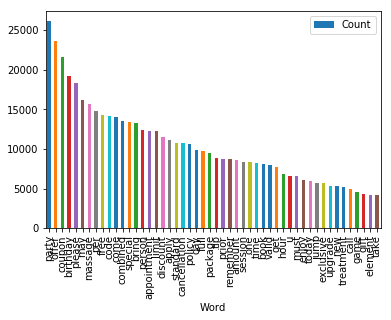

In [36]:
import collections

wordcount = {}
for index, row in campCoup.iterrows():
    
    for word in row['text'].split():
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

            
n_print=50
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [45]:
test = list(df['Word'])
test.remove('massage')
test

['party',
 'offer',
 'coupon',
 'birthday',
 'please',
 'may',
 'per',
 'free',
 'code',
 'come',
 'combined',
 'special',
 'bring',
 'person',
 'appointment',
 'limit',
 'discount',
 'apply',
 'standard',
 'cancellation',
 'policy',
 'day',
 'full',
 'package',
 'tip',
 'prior',
 'remember',
 'amount',
 'session',
 'one',
 'time',
 'book',
 'valid',
 'get',
 'hour',
 'u',
 'must',
 'enjoy',
 'today',
 'jump',
 'exclusive',
 'upgrade',
 'new',
 'treatment',
 'call',
 'game',
 'gift',
 'element',
 'take']

In [46]:
def preprocess2(text):
    # replace one or more white-space characters with a space
    
    
    #text = text.split()                                              
    text = ' '.join([w for w in text.split() if w  not in test]) 
  
    return text

In [48]:
campCoup['text']=campCoup['text'].apply(preprocess2)
campCoup['Ustext']=campCoup['Ustext'].apply(preprocess2)

campCoup.head(5)

,campaign_id,created_at,description,fine_print,id,option,post_purchase_message,title,updated_at,text,Ustext
0,83802,2016-01-01 11:51:02,Want a great deal on the best massage in Sunny...,"---\n- Valid for new clients only, limit one p...",3614,$30 Off a 1-Hour Session or $40 Off a 90-Minut...,Please bring your coupon code when you come in.,Save $30-40 Off The Best Massage in Sunnyvale,2019-04-10 04:10:48,want great deal best massage sunnyvale massage...,want great deal best massage sunnyvale massage...
1,83806,2016-01-01 17:26:43,,---\n- Limit 1 per person.\n- May not be combi...,3615,,Please bring your coupon code when you come in.,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:26:43,wrapped wellness,wrapped wellness
2,83807,2016-01-01 17:29:57,,---\n- Limit 1 per person.\n- May not be combi...,3616,,Please bring your coupon code when you come in.,Enjoy this coupon from Wrapped In Wellness,2016-01-01 17:29:57,wrapped wellness,wrapped wellness
3,83808,2016-01-01 17:36:21,Happy New Year from the Wrapped In Wellness Fa...,---\n- Limit 1 per person.\n- May not be combi...,3617,Our Gift to You....Enjoy A Free Face Wrap With...,Please bring your coupon code when you come in.,Happy New Year from Wrapped In Wellness,2016-01-05 20:03:41,happy year wrapped wellness family let make be...,happy year wrapped wellness family let make be...
4,83817,2016-01-02 19:59:02,LIMITED TIME OFFER!!\nYOU RECEIVE: SkinMedica ...,---\n- Coupon is valid through January 31st 20...,3618,Claim the Coupon to Give to Your Friend,Please bring your coupon code when you come in.,MD Laser Spa FREE Botox Program!!,2016-01-26 15:00:10,limited receive skinmedica replenish hydrating...,limited receive skinmedica replenish hydrating...


In [65]:
campCoup.to_csv("coupon_proce.csv")

In [49]:
mydict=campCoup.set_index('campaign_id').T.to_dict('list')

In [66]:
campCoup['text'][0]

'want great deal best massage sunnyvale element massage sunnyvale special offer new client hour session regular save minute session regular save call u today let u show great massage change everything join wellness program get great price massage every month hour session minute sessionplease bring coupon code come valid new client limit one per person may combined offer standard hour cancellation policy applies offer expires day date claimed session include time dressing consultation save best massage sunnyvale'

In [50]:
myDict_bus = {('campaign_id'):[]}

for index, row in campCoup.iterrows():
    
    for word in row['Ustext'].split():
        myDict_bus.setdefault((row['campaign_id']),[]).append(word)   
    

In [51]:
words=campCoup['Ustext'].tolist()
uniq=[]

In [52]:
for txt in words:
    for word in txt.split():
        if word in uniq:
            pass
        else:
            uniq.append(word)
    

# Nothing

In [ ]:
df = pd.DataFrame({'key1': [], 'key2': [], 'key3': []})
for i in range(10):
    df = df.append({'key1': i, 'key2': i*2, 'key3': i**3}, ignore_index=True)

<h3>end Nothing</h3>

In [53]:
df=pd.DataFrame()
df['campaign_id']=myDict_bus.keys()

In [54]:
for col in uniq:
    df[col] = 0

In [123]:
df[df['campaign_id']==83802]['want']

7668    1
Name: want, dtype: int64

In [55]:
for key,value in myDict_bus.items():
    for word in value:
        #df[df['campaign_id']==key][word]=1
        df.loc[df['campaign_id'] ==key, word] = 1

        #df = df.append({word: 1}, ignore_index=True)

In [56]:
df.to_csv("/Users/georgesalteris/Projects/FetchRev/vector2.csv")

In [57]:
df.shape

(13873, 21622)

In [5]:
vector =pd.read_csv("/Users/georgesalteris/Projects/FetchRev/vector2.csv")
vector.head(4)

,Unnamed: 0,campaign_id,want,great,deal,best,massage,sunnyvale,client,regular,...,smyrna,fast—treat,stbetter,membershipthanks,best—here,kidsworldla,kannapolis,offertest,aloha,lapeer
0,0,131072,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,131073,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,169302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,192039,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
bus = pd.read_json("/Users/georgesalteris/Projects/FetchRev/campaignsWithBusiness.json")
bus.shape

(129187, 17)

In [7]:
bus.head(4)

,business_approval_granted_at,business_approval_requested_at,business_id,converted_from_offer_id,created_at,finish_at,id,is_template,name,owner_editing_locked,payload_type,properties,redirect_url,special_occasion,start_at,status,updated_at
0,NaT,NaT,3501,NaN,2016-01-01 09:10:32,2016-01-02 14:30:00,83797,0,Fri Jan 1st AA,0,Campaign::Newsletter,---\n:target_audience: 2\n:delivered_scheduled...,None,None,2016-01-01 14:30:00,finished,2016-01-02 14:30:02
1,NaT,NaT,3502,NaN,2016-01-01 09:29:01,2016-01-02 14:30:01,83798,0,Jan 1st AA,0,Campaign::Newsletter,---\n:target_audience: 2\n:delivered_scheduled...,None,None,2016-01-01 14:30:00,finished,2016-01-02 14:30:02
2,NaT,NaT,3503,NaN,2016-01-01 09:41:02,2016-01-02 14:45:00,83799,0,Fri Jan 1st AA,0,Campaign::Newsletter,---\n:target_audience: 2\n:delivered_scheduled...,None,None,2016-01-01 14:45:00,finished,2016-01-02 14:45:01
3,NaT,NaT,3853,NaN,2016-01-01 09:46:04,2016-01-02 14:30:02,83800,0,"Fri, Jan 1st AA",0,Campaign::Newsletter,---\n:target_audience: 2\n:delivered_scheduled...,None,None,2016-01-01 14:30:00,finished,2016-01-02 14:30:03


In [8]:
len(bus.business_id.unique())

2069

In [9]:
keysIndexCampaigns={}
for index, row in vector.iterrows():
    #print(row['campaign_id'],index)
    keysIndexCampaigns[row['campaign_id']]=index
    #break

In [10]:
myDict_bus = {('business_id'):[]}
camp_bus={}
for index, row in bus.iterrows():
    camp_bus[row['id']]=row['business_id']
    if row['id'] in keysIndexCampaigns.keys():
        myDict_bus.setdefault((row['business_id']),[]).append(row['id'])   
        

In [76]:
len(myDict_bus.keys())

1491

In [11]:
maxC=0
busid=0
busidmin=0
minzero=[]
minC=1000
for key,value in myDict_bus.items():
    if len(myDict_bus[key]) > maxC:
        maxC=len(myDict_bus[key])
        busid=key
    if len(myDict_bus[key]) < minC:
        minC=len(myDict_bus[key])
        busidmin=key
    if len(myDict_bus[key])==0:
        minzero.append(key)
maxC

185

In [12]:
vector.drop(["Unnamed: 0"],inplace=True,axis=1)
vector.head(3)

,campaign_id,want,great,deal,best,massage,sunnyvale,client,regular,save,...,smyrna,fast—treat,stbetter,membershipthanks,best—here,kidsworldla,kannapolis,offertest,aloha,lapeer
0,131072,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,131073,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,169302,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
vector = vector[vector.campaign_id != 'campaign_id']


In [14]:
vector['campaign_id'][vector.campaign_id == 4086]

Series([], Name: campaign_id, dtype: object)

In [15]:
vector['campaign_id']=pd.to_numeric(vector['campaign_id'])

In [16]:
vectorTest1=vector.copy()

In [58]:
camp_bus[107454]

2491

In [17]:
for index,row in vectorTest1.iterrows():
    vectorTest1.set_value(index,'campaign_id',camp_bus[row['campaign_id']])

In [68]:
vectorTest1.head(5)

,campaign_id,want,great,deal,best,massage,sunnyvale,client,regular,save,...,smyrna,fast—treat,stbetter,membershipthanks,best—here,kidsworldla,kannapolis,offertest,aloha,lapeer
0,4086,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4135,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2441,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4441,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3920,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
vectorTest1['campaign_id'][vectorTest1.campaign_id == 4086]

0        4086
71       4086
259      4086
774      4086
891      4086
892      4086
2085     4086
2794     4086
2939     4086
4108     4086
4130     4086
6621     4086
6792     4086
7327     4086
7359     4086
7920     4086
8003     4086
8286     4086
8963     4086
10527    4086
10592    4086
11603    4086
11745    4086
11905    4086
13060    4086
Name: campaign_id, dtype: int64

In [18]:
test =vectorTest1.groupby('campaign_id').sum()

In [17]:
test.head(5)

,want,great,deal,best,massage,sunnyvale,client,regular,save,minute,...,smyrna,fast—treat,stbetter,membershipthanks,best—here,kidsworldla,kannapolis,offertest,aloha,lapeer
campaign_id,,,,,,,,,,,,,,,,,,,,,
52,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,3,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
524,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
myDict_bus[52]

[97100]

In [19]:
liTe=[]
for i in vectorTest1['campaign_id']:
    if i not in liTe:
        liTe.append(i)

In [20]:
liTe.sort()
liTe[22]

1593

In [123]:
liTe[309]

3890

# Create numpy matrix

In [11]:
vectNoId=vector.drop(["campaign_id"],axis=1)

In [12]:
numpy_matrix = vectNoId.as_matrix()


In [13]:
numpy_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
import scipy.spatial.distance as sp_dist


In [15]:
numpy_matrix.shape

(13876, 21274)

# Create numpy matrix with bus

In [21]:
numpy_matrix=test.as_matrix()
numpy_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0]])

In [22]:
numpy_matrix.shape

(1490, 21621)

# Calculate similarity between campaigns

In [23]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


dist_out = 1-pairwise_distances(numpy_matrix, metric="cosine")
#dist_out

In [24]:
dist_out

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.03082196, 0.        ,
        0.01347651],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03082196, 0.        , ..., 1.        , 0.        ,
        0.14798801],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.01736834],
       [0.        , 0.01347651, 0.        , ..., 0.14798801, 0.01736834,
        1.        ]])

# calculate pairwise cosine similarity

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A_sparse = sparse.csr_matrix(numpy_matrix)

similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))


pairwise dense output:
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.03082196 0.         0.01347651]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.03082196 0.         ... 1.         0.         0.14798801]
 [0.         0.         0.         ... 0.         1.         0.01736834]
 [0.         0.01347651 0.         ... 0.14798801 0.01736834 1.        ]]

pairwise sparse output:
   (0, 1476)	0.02839809171235324
  (0, 1329)	0.008994784537014432
  (0, 1312)	0.025993762245501817
  (0, 1304)	0.022703830459324992
  (0, 905)	0.03892494720807615
  (0, 904)	0.03892494720807615
  (0, 903)	0.03892494720807615
  (0, 902)	0.03766217885773548
  (0, 857)	0.029002094671369907
  (0, 855)	0.03450327796711771
  (0, 854)	0.03375263702778072
  (0, 853)	0.03375263702778072
  (0, 852)	0.03375263702778072
  (0, 736)	0.036332397436011236
  (0, 735)	0.03520893951097652
  (0, 723)	0.009151617004789102


In [107]:
similarities.shape

(1490, 1490)

In [26]:
maxS=0
indI=0
indJ=0
for i in range(similarities[0].size):
    for j in range(similarities[0].size):
        
        if similarities[i][j]>maxS and i!=j:
            maxS=similarities[i][j]
            indI=i
            indJ=j

In [27]:
testSim = {}
#mydict[(usermac1,useragent1)] = [ [area1, videoid1, 10],[area1,videoid2,29]... ]

In [28]:
for i in range(similarities[0].size):
    for j in range(similarities[0].size):
        if similarities[i][j]>0.65 and i!=j and (liTe[j],liTe[i]) not in testSim.keys() :
            testSim[(liTe[i],liTe[j])]=(similarities[i][j])

In [26]:
testSim

{(3884, 3957): 0.7585685007750537,
 (4902, 4922): 0.6759568334318574,
 (4904, 5388): 0.7916331135924697,
 (3955, 4253): 0.6709383853748888,
 (4016, 4151): 0.7695566360618472,
 (4035, 4395): 0.6682417490976067,
 (5335, 5443): 0.8520128672302582,
 (3892, 4263): 0.9659865583742676,
 (3115, 3649): 0.6529135911253625,
 (3972, 3990): 0.733577149007255,
 (3895, 4282): 0.6948323783670483,
 (3861, 3915): 0.8734083215629621,
 (3092, 4210): 0.6799822276461074,
 (5257, 5368): 0.6898235559594483,
 (3846, 4271): 0.8144794411770079,
 (4744, 4761): 0.9791174747949188,
 (4194, 4282): 0.6871011895107805,
 (4303, 4556): 0.8066318263927059,
 (4540, 4575): 0.8462071786727657,
 (3776, 5064): 0.8538532291497496,
 (3910, 4244): 0.7499816038950644,
 (5045, 5494): 0.7290934268877275,
 (4855, 4856): 0.9482047311291432,
 (4253, 4344): 0.7725943031091733,
 (3891, 3983): 0.6749655638598872,
 (4904, 5257): 0.7098628968989045,
 (3982, 4163): 0.6966270280991287,
 (3772, 3852): 0.750939410689655,
 (4828, 4889): 0.70926

In [29]:
for key in testSim.keys():
    print(testSim[key[0],key[1]])
    break

0.7585685007750537


# create graph

In [29]:
import itertools
import copy
import networkx

In [30]:
g = networkx.Graph()
threshold = 0.5


In [150]:
labels=[]
for key in testSim.keys():
    g.add_node(key[0])
    labels.append(key[0])

In [136]:
my_edges=testSim.keys()
g.add_edges_from(my_edges)

In [31]:
for key in testSim.keys():
   # g.add_node(key[0])
    if testSim[key[0],key[1]] > threshold:
        g.add_edge(key[0], key[1], weight=testSim[key[0],key[1]])

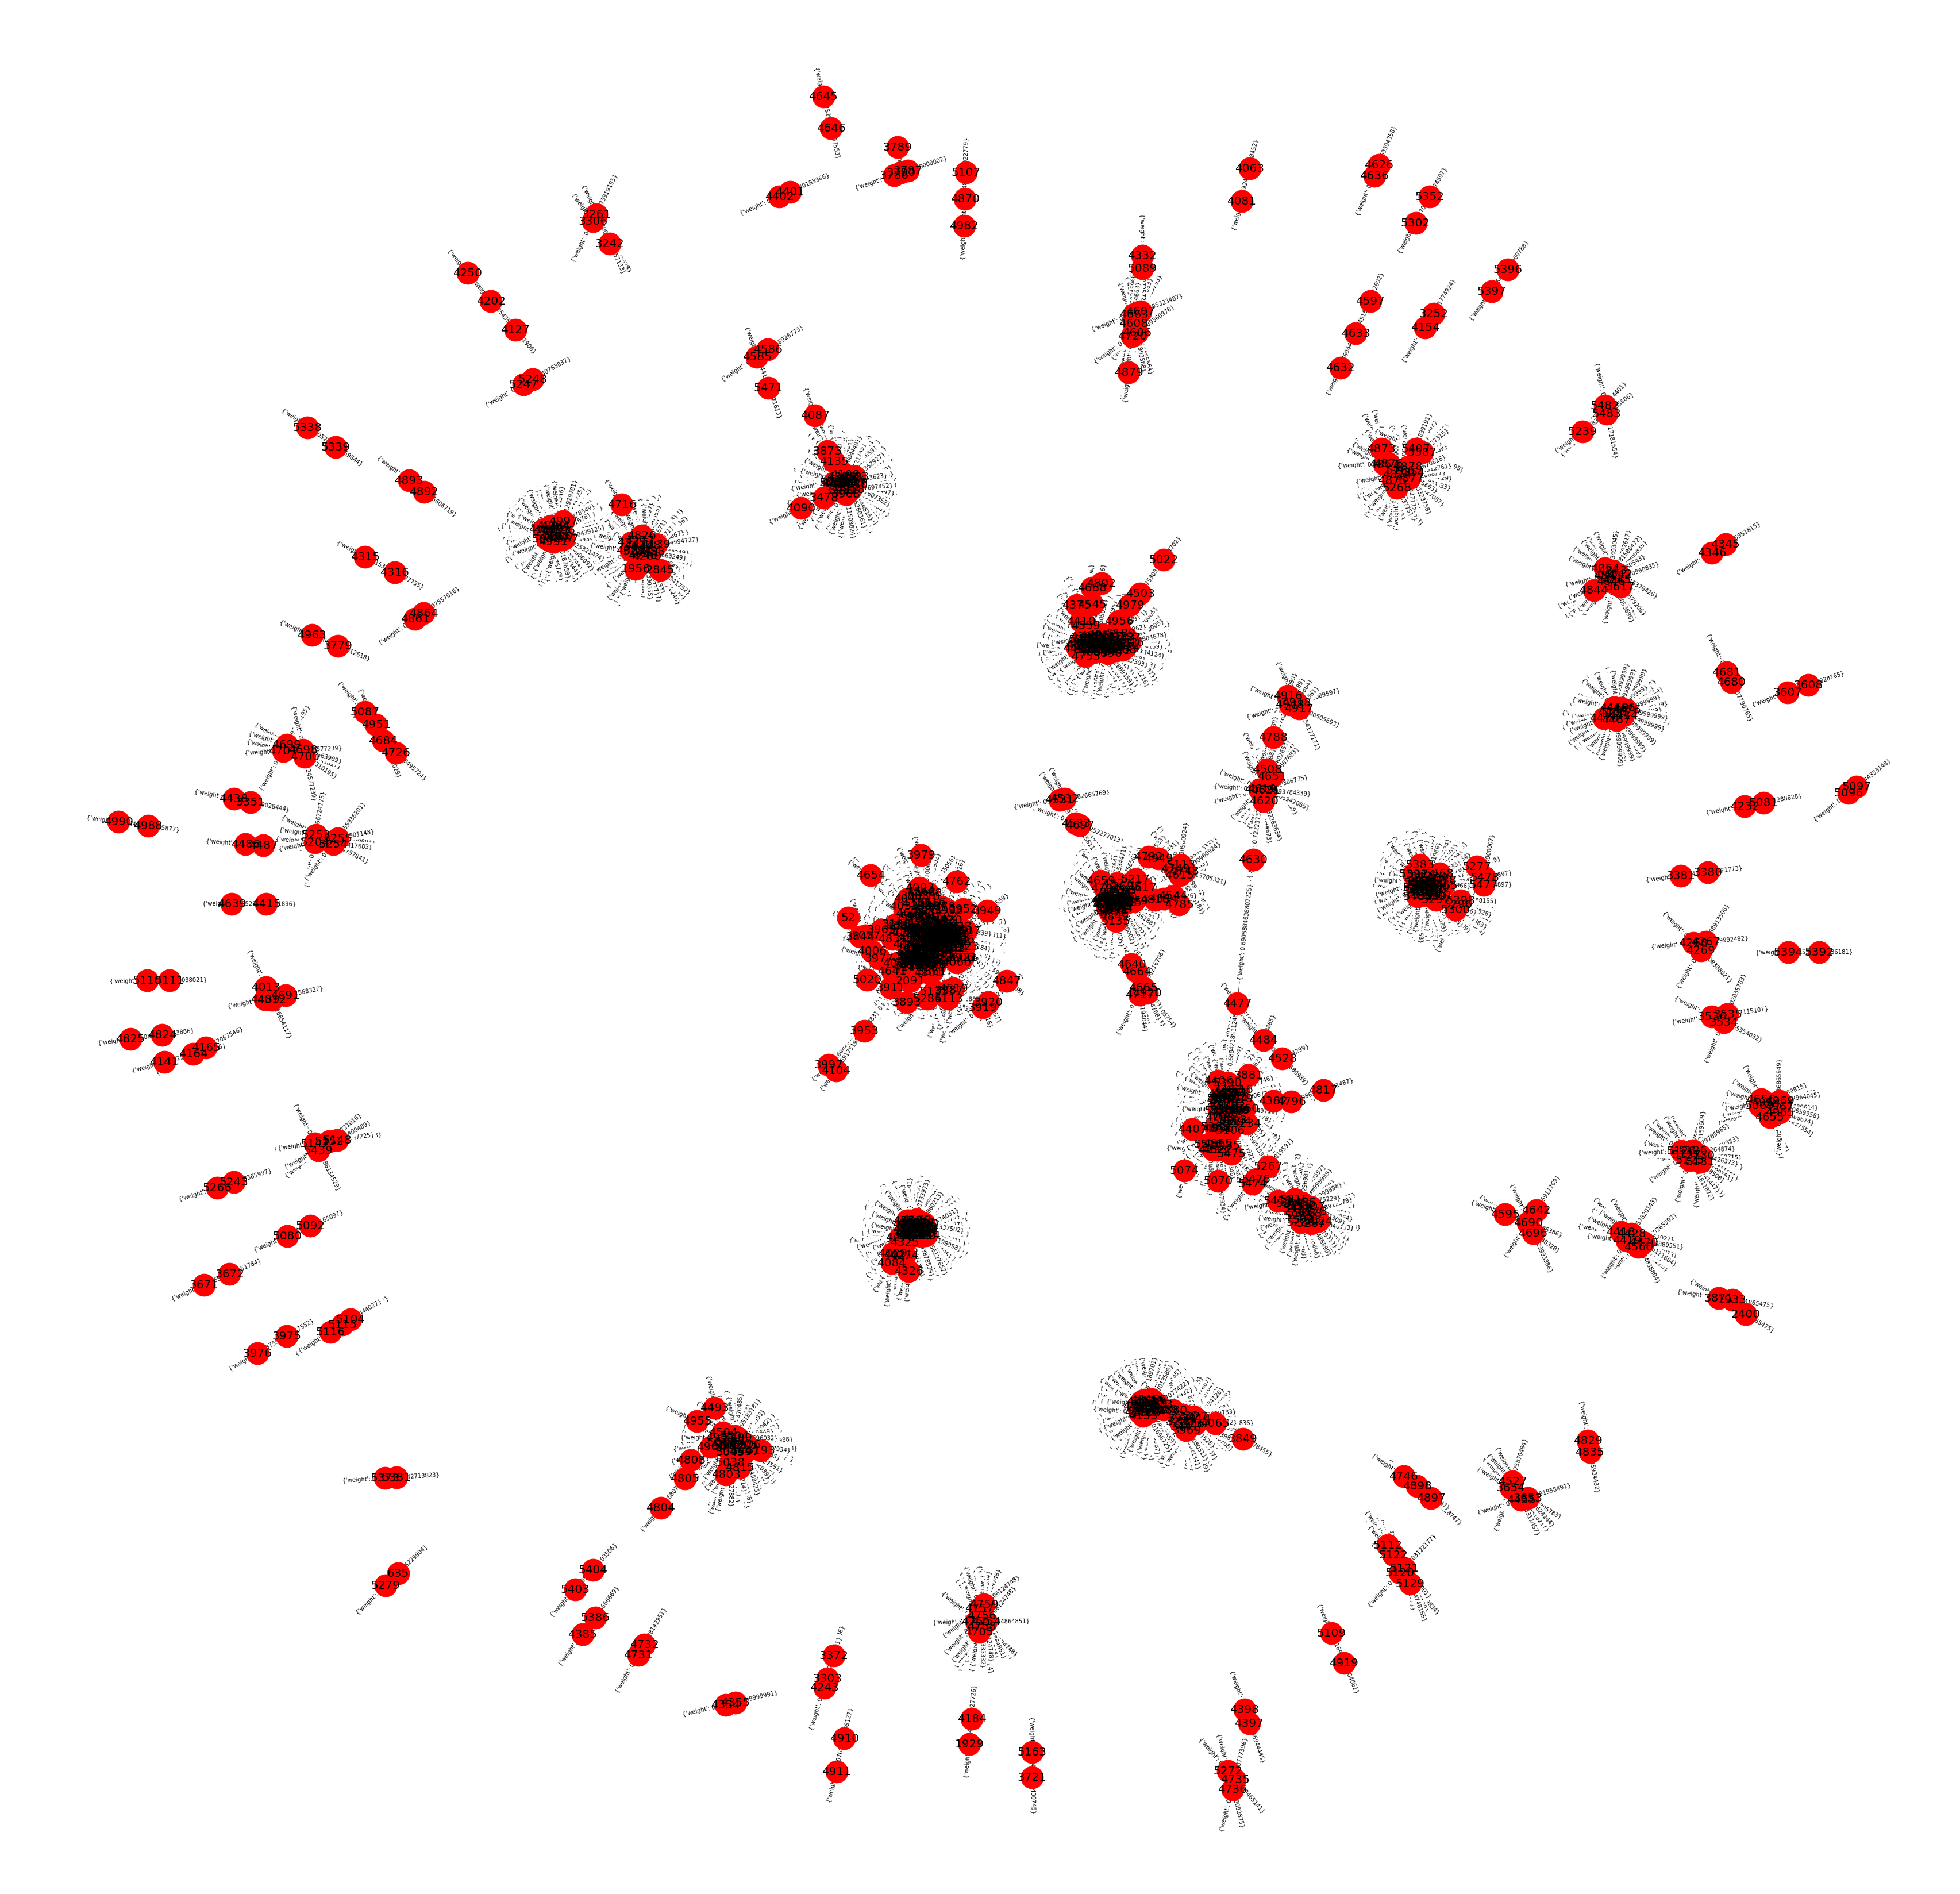

In [38]:
pos=networkx.spring_layout(g)
plt.figure(figsize=(60,60))
networkx.draw_networkx_nodes(g,pos,node_size=1500)
networkx.draw_networkx_labels(g,pos,font_size=20)
edgewidth = [ d['weight'] for (u,v,d) in g.edges(data=True)]
networkx.draw_networkx_edges(g,pos,width=edgewidth)
edgelabel = networkx.get_edge_attributes(g,'weight')
networkx.draw_networkx_edge_labels(g,pos)
plt.axis('off') 
plt.savefig("fig.png")
plt.show()

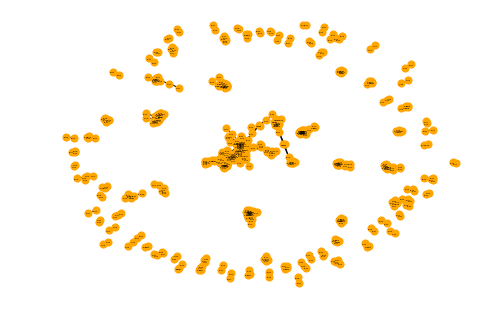

In [55]:
nx.draw(g, with_labels=True, node_color='orange', node_size=50, edge_color='black', linewidths=1, font_size=2)


In [ ]:
from matplotlib import pylab

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(500, 500), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos,node_size=200)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos,font_size=5)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(g,"my_graph.pdf")

# graph coordinates

In [33]:
pos = networkx.spring_layout(g)



In [34]:
li1=[]
li2=[]
li3=[]
for i in pos:
    li1.append(i)
    li2.append(pos[i][0])
    li3.append(pos[i][1])
    #print(i,pos[i])
    #break

In [35]:
dfTest= pd.DataFrame()

In [173]:
pos[4096]

array([-0.57580268,  0.20794256])

In [36]:
dfTest['id']=li1
dfTest['long']=li2
dfTest['lang']=li3

In [37]:
dfTest.to_csv("IdsAndCoordAll.csv")

# create a dictionary to pair campaign id with index for corr matrix

In [9]:
keysIndexCampaigns={}
for index, row in vector.iterrows():
    #print(row['campaign_id'],index)
    keysIndexCampaigns[row['campaign_id']]=index
    #break

In [10]:
keysIndexCampaigns

{131072: 0,
 131073: 1,
 169302: 2,
 163677: 13780,
 98315: 4,
 98316: 5,
 98317: 6,
 98318: 7,
 120152: 8,
 207534: 9,
 131095: 10,
 196639: 11,
 196640: 12,
 196645: 13,
 196646: 14,
 196647: 15,
 131116: 16,
 196653: 17,
 163888: 18,
 163889: 19,
 98354: 20,
 163891: 21,
 196660: 22,
 196661: 23,
 131126: 24,
 196664: 25,
 196666: 26,
 98363: 27,
 196673: 3599,
 131140: 29,
 196677: 30,
 163910: 31,
 131144: 32,
 163913: 240,
 163914: 34,
 98379: 35,
 98380: 36,
 163853: 37,
 163921: 38,
 147470: 6990,
 125625: 11409,
 196698: 41,
 196701: 42,
 196704: 43,
 196706: 44,
 196708: 45,
 131175: 46,
 196712: 47,
 196714: 48,
 131179: 49,
 131181: 50,
 98414: 51,
 163951: 52,
 196721: 53,
 196723: 54,
 98420: 55,
 98423: 56,
 196728: 57,
 131194: 58,
 163964: 59,
 163965: 60,
 196734: 61,
 98432: 62,
 196737: 63,
 98438: 64,
 131207: 65,
 131208: 66,
 131209: 67,
 98445: 68,
 163983: 69,
 163984: 70,
 196753: 71,
 163986: 72,
 204259: 5611,
 163989: 73,
 131222: 74,
 131223: 75,
 131224: 

# may need but probably not

In [48]:
keysIndexBusiness={}
for keys,values in myDict_bus.items():
    #print(list(myDict_bus.keys()).index(keys))
    keysIndex[keys]=list(myDict_bus.keys()).index(keys)

In [85]:
similarities[keysIndexCampaigns[101204]][keysIndexCampaigns[201341]]

0.1716332522894021

In [76]:
myDict_bus

{4096: [101204,
  113759,
  115576,
  115664,
  117824,
  118065,
  123571,
  124347,
  126067,
  126364,
  126716,
  131064,
  192050,
  192702,
  194720,
  195942,
  195956,
  196736,
  202974,
  203794,
  206001],
 4098: [98239],
 4099: [99822, 105065, 182236],
 4100: [98827, 98828, 98830, 99129, 105627, 123079, 129735, 171490],
 4101: [98292, 98293, 98294],
 4103: [101536,
  101661,
  106302,
  108637,
  109377,
  118821,
  122206,
  123939,
  130480,
  131031,
  146958,
  159296,
  159983,
  161900,
  162308,
  162317,
  162320,
  162326,
  162890,
  165218,
  166328,
  166719,
  167078,
  169663,
  171252,
  173122,
  173159,
  199377,
  205960],
 4104: [121773, 123080, 127419, 140557, 140558],
 4105: [98942,
  99951,
  99958,
  100226,
  100234,
  100237,
  106179,
  108191,
  108592,
  108655,
  108656,
  111197,
  113073,
  117919,
  119495,
  119677,
  123640,
  124466,
  125569,
  155472],
 4106: [104715, 104717, 119560, 119873, 122201],
 4108: [101708,
  111914,
  115582,
 

In [13]:
K = numpy_matrix.shape[0]
distance_mat = np.empty((K, K), dtype=float)
distance_mat.shape

(13876, 13876)

In [19]:
for i, ac in enumerate(numpy_matrix):
    for j, bc in enumerate(numpy_matrix):
      # print(type(ac),type(bc))
        #if i > j:
        #    continue
        #el
        if i == j:
            #c = 0
            distance_mat[i , j]=0
        else:
            c = sp_dist.cosine(ac,bc)
            #print(c)
            distance_mat[i , j] = c
            #distance_mat[j , i] = c
        #print(distance_mat[i,j])
    

KeyboardInterrupt: 

# TEST SUBS

In [97]:
import ijson
filename = "/Volumes/WDGeorge/fetchRev/CORRUPT.anonymized_subscribers.json"
with open(filename, 'r') as f:
    objects = ijson.items(f,'meta')
    columns = list(objects)

KeyboardInterrupt: 

In [ ]:
filename = "/Volumes/WDGeorge/fetchRev/CORRUPT.anonymized_subscribers.json"
with open(filename, "r") as f:
    count=0
    for line in f:
        if count%12==0:
            
            print(line)
        count++;
            break
